# K-Means Clustering

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
import pandas as pd

# Read data from a file
data = pd.read_csv('Mall_Customers.csv')

In [71]:
print(data)

     CustomerID   Genre  Age  AnnualIncome  SpendingScore
0             1    Male   19            15             39
1             2    Male   21            15             81
2             3  Female   20            16              6
3             4  Female   23            16             77
4             5  Female   31            17             40
..          ...     ...  ...           ...            ...
195         196  Female   35           120             79
196         197  Female   45           126             28
197         198    Male   32           126             74
198         199    Male   32           137             18
199         200    Male   30           137             83

[200 rows x 5 columns]


C:\Users\rafay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rafay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rafay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

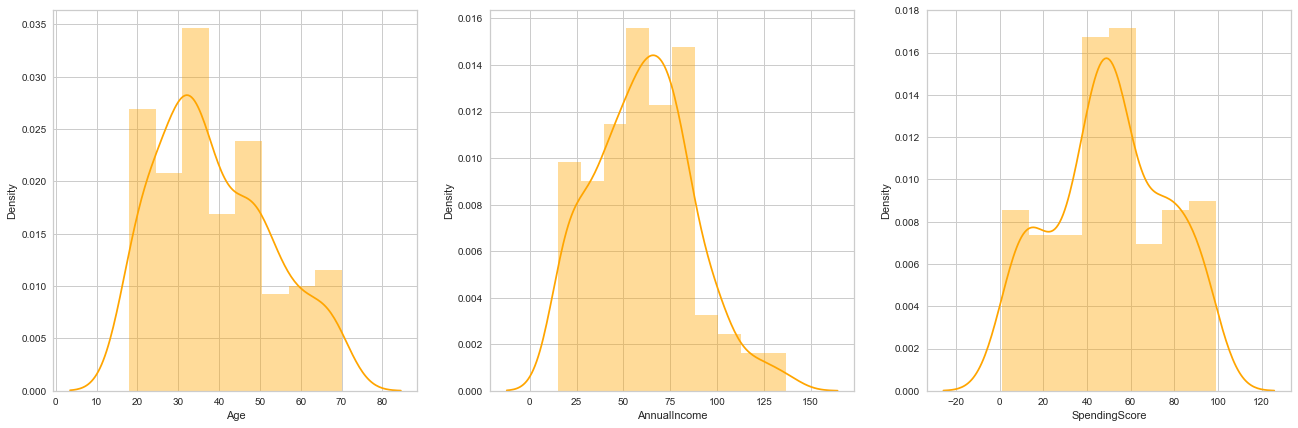

In [132]:
import seaborn as sns

plt.figure(figsize=(30,7))
plotnumber = 1

for column in data.iloc[:,1:]:
  if plotnumber <= 8:
    ax = plt.subplot(1,4,plotnumber)
    sns.distplot(data[column],color = "orange")
    plt.xlabel(column)
  plotnumber+=1
plt.show()

In [72]:
data = data.drop('CustomerID', axis=1)
print(data)

      Genre  Age  AnnualIncome  SpendingScore
0      Male   19            15             39
1      Male   21            15             81
2    Female   20            16              6
3    Female   23            16             77
4    Female   31            17             40
..      ...  ...           ...            ...
195  Female   35           120             79
196  Female   45           126             28
197    Male   32           126             74
198    Male   32           137             18
199    Male   30           137             83

[200 rows x 4 columns]


In [73]:
# Create a new variable by selecting columns 2 and 3
selected_variables = data.iloc[:, 2:4]

In [74]:
print(selected_variables)

     AnnualIncome  SpendingScore
0              15             39
1              15             81
2              16              6
3              16             77
4              17             40
..            ...            ...
195           120             79
196           126             28
197           126             74
198           137             18
199           137             83

[200 rows x 2 columns]


In [75]:
X = selected_variables.values
print(X)
type(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

numpy.ndarray

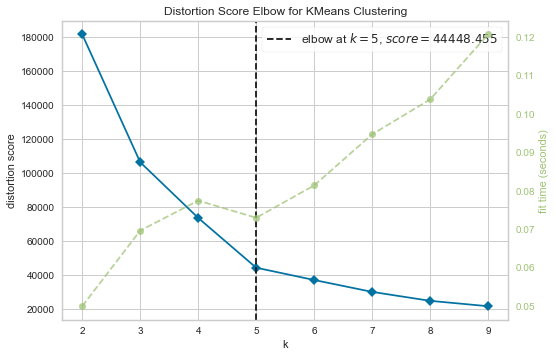

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [134]:
# Use the KElbowVisualizer to find the optimal number of clusters (k)
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 10))  # You can adjust the range of k as needed

# Fit the visualizer to the data
visualizer.fit(X)

# Visualize the elbow plot
visualizer.show()

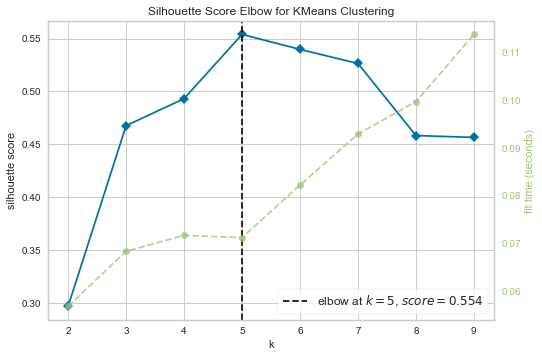

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [135]:
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 10), metric='silhouette')  # You can adjust the range of k as needed

# Fit the visualizer to the data
visualizer.fit(X)

# Visualize the elbow plot
visualizer.show()

In [77]:
# Create a KMeans instance
n_clusters = 5  # Set the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

In [78]:
# Fit the model to the data
kmeans.fit(X)

KMeans(n_clusters=5, random_state=42)

In [79]:
# Get the cluster centers and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

In [87]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.553931997444648


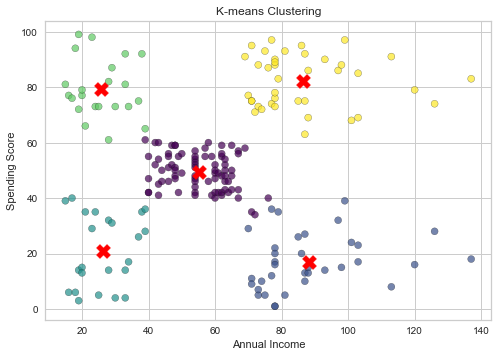

In [81]:
# Visualize the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.7, edgecolors='k')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200)
plt.title('K-means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

# K-Medoids Clustering

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
import pandas as pd

In [100]:
# Read data from a file
data = pd.read_csv('Mall_Customers.csv')

In [101]:
data = data.drop('CustomerID', axis=1)
print(data)

      Genre  Age  AnnualIncome  SpendingScore
0      Male   19            15             39
1      Male   21            15             81
2    Female   20            16              6
3    Female   23            16             77
4    Female   31            17             40
..      ...  ...           ...            ...
195  Female   35           120             79
196  Female   45           126             28
197    Male   32           126             74
198    Male   32           137             18
199    Male   30           137             83

[200 rows x 4 columns]


In [102]:
# Create a new variable by selecting columns 2 and 3
selected_variables = data.iloc[:, 2:4]

print(selected_variables)

     AnnualIncome  SpendingScore
0              15             39
1              15             81
2              16              6
3              16             77
4              17             40
..            ...            ...
195           120             79
196           126             28
197           126             74
198           137             18
199           137             83

[200 rows x 2 columns]


In [103]:
X = selected_variables.values
print(X)
type(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

numpy.ndarray

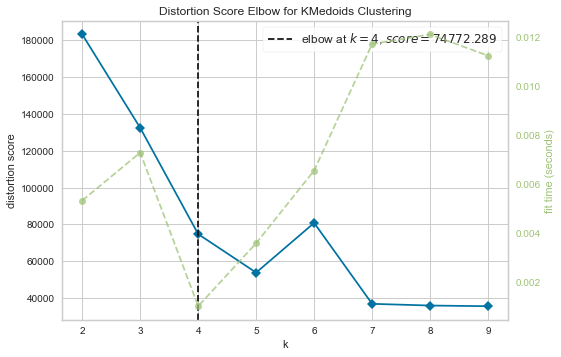

<AxesSubplot:title={'center':'Distortion Score Elbow for KMedoids Clustering'}, xlabel='k', ylabel='distortion score'>

In [110]:
# Use the KElbowVisualizer to find the optimal number of clusters (k)
model = KMedoids(random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 10))  # You can adjust the range of k as needed

# Fit the visualizer to the data
visualizer.fit(X)

# Visualize the elbow plot
visualizer.show()

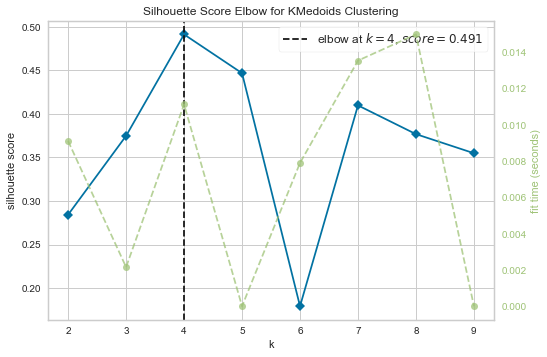

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMedoids Clustering'}, xlabel='k', ylabel='silhouette score'>

In [136]:
model = KMedoids(random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 10), metric='silhouette')  # You can adjust the range of k as needed

# Fit the visualizer to the data
visualizer.fit(X)

# Visualize the elbow plot
visualizer.show()

In [111]:
# Use the optimal number of clusters from the elbow plot
n_clusters = visualizer.elbow_value_

# Create a KMedoids instance with the optimal number of clusters
kmedoids = KMedoids(n_clusters=n_clusters, random_state=42)

# Fit the model to the data
kmedoids.fit(X)

KMedoids(n_clusters=4, random_state=42)

In [112]:
# Get the cluster indices and labels
medoid_indices = kmedoids.medoid_indices_
labels = kmedoids.labels_

In [113]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.49134481552180226


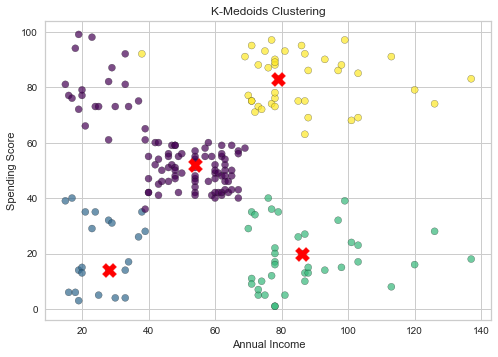

In [114]:
# Visualize the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.7, edgecolors='k')
plt.scatter(X[medoid_indices, 0], X[medoid_indices, 1], c='red', marker='X', s=200)
plt.title('K-Medoids Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

# DBSCAN Clustering

In [115]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import pandas as pd

In [116]:
# Read data from a file
data = pd.read_csv('Mall_Customers.csv')

# Drop unnecessary columns
data = data.drop('CustomerID', axis=1)

# Create a new variable by selecting columns 2 and 3
selected_variables = data.iloc[:, 2:4]

In [117]:
# Extract features
X = selected_variables.values

In [121]:
# Use the silhouette score to find the optimal parameters for DBSCAN
best_eps = None
best_min_samples = None
best_silhouette = -1

eps_values = np.linspace(0.1, 2.0, 20)
min_samples_values = range(2, 10)


for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)
        
        # Check if there are at least two unique labels
        if len(np.unique(labels)) > 1:
            silhouette_avg = silhouette_score(X, labels)
            
            if silhouette_avg > best_silhouette:
                best_silhouette = silhouette_avg
                best_eps = eps
                best_min_samples = min_samples

# Print the best parameters
print(f"Best eps: {best_eps}, Best min_samples: {best_min_samples}, Best Silhouette Score: {best_silhouette}")

Best eps: 2.0, Best min_samples: 2, Best Silhouette Score: -0.06783993130647799


In [122]:
# Create a DBSCAN instance with the best parameters
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)

# Fit the model to the data
labels = dbscan.fit_predict(X)

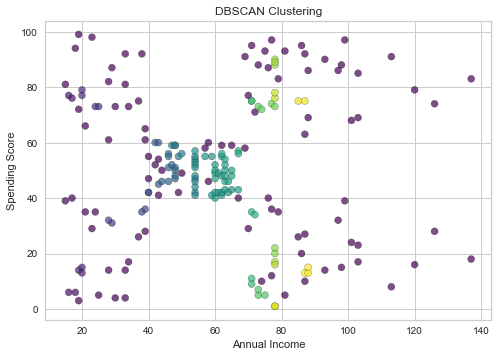

In [123]:
# Visualize the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.7, edgecolors='k')
plt.title('DBSCAN Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()